In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KNN:
    def __init__(self, k=3):
        """ Initializes the KNN classifier.
        
        Args:
        - k (int): Number of neighbors to consider for classification.
        """
        self.k = k
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """ Fits the model using the training data.

        Args:
        - X_train (list of list of floats): Training data features.
        - y_train (list of floats): Training data labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """ Predicts the class labels for the provided data.

        Args:
        - X_test (list of list of floats): Test data features.

        Returns:
        - predictions (list of floats): Predicted labels for the test data.
        """
        predictions = [self._predict(x) for x in X_test]
        return predictions

    def _predict(self, x):
        """Predicts the class label for a single data point.

        Args:
        - x (list of floats): Features of the data point.

        Returns:
        - vote (float): Predicted label for the data point.
        """
        # Compute distances to all points in the training set
        distances = [np.sqrt(np.sum((np.array(x) - np.array(point))**2)) for point in self.X_train]
        
        # Get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label among them
        vote = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return vote
        
    def visualize(self):
        plt.scatter([x[0] for x in self.X_train], [x[1] for x in self.X_train], c=self.y_train, marker='o', label='Training Data')
        plt.title("Visualization of Training Data")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

    def visualize(self, x_data, y_data):
        plt.scatter([x[0] for x in x_data], [x[1] for x in x_data], c=y_data, marker='o', label='Training Data')
        plt.title("Visualization of Training Data")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()
        
    def compute_error(self, y_true, y_pred):
        return np.mean(np.array(y_true) != np.array(y_pred))

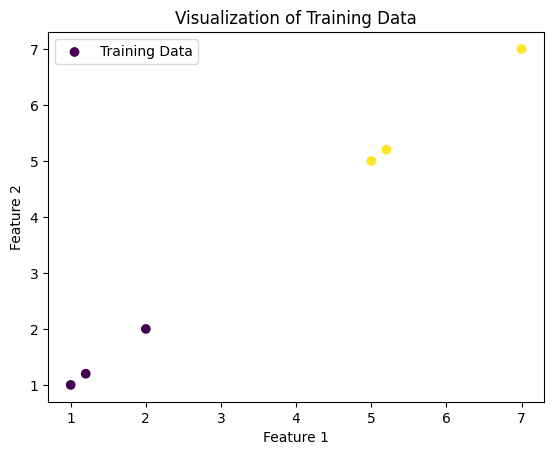

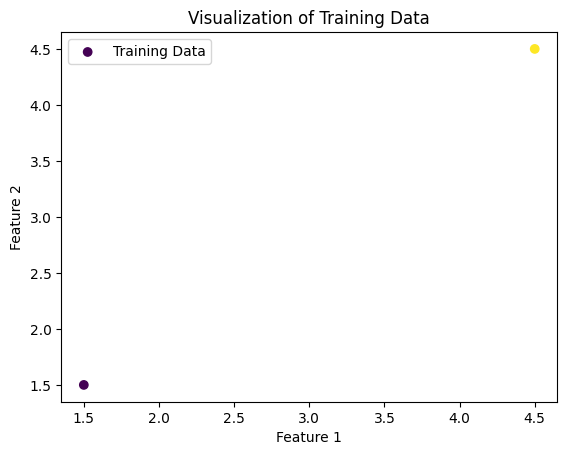

Training Error: 0.00%
Test Error: 0.00%


In [2]:
# Example usage:
X_train = [[1, 1],  [1.2, 1.2], [2, 2], [5, 5],  [5.2, 5.2], [7, 7]]
y_train = [0, 0, 0, 1, 1, 1]
X_test = [[1.5, 1.5], [4.5, 4.5]]
y_test = [0, 1]

knn = KNN(k=2)
knn.fit(X_train, y_train)
knn.visualize(X_train, y_train)
knn.visualize(X_test, y_test)
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

train_error = knn.compute_error(y_train, train_predictions)
test_error = knn.compute_error(y_test, test_predictions)

print(f"Training Error: {train_error*100:.2f}%")
print(f"Test Error: {test_error*100:.2f}%")

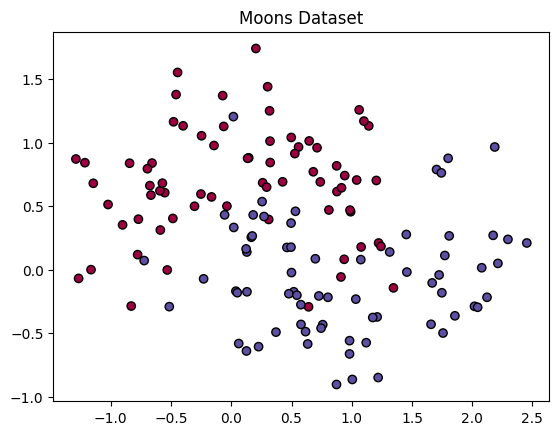

In [18]:
from sklearn.datasets import make_moons

# Generate Moons dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
# Split the dataset into training and test sets
split_ratio = 0.7
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Visualize the moons dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Moons Dataset")
plt.show()

k=1: Training Error: 0.00% | Test Error: 16.67%
k=3: Training Error: 6.43% | Test Error: 8.33%
k=5: Training Error: 6.43% | Test Error: 10.00%
k=7: Training Error: 7.14% | Test Error: 13.33%
k=9: Training Error: 6.43% | Test Error: 11.67%
k=11: Training Error: 5.71% | Test Error: 11.67%
k=13: Training Error: 6.43% | Test Error: 11.67%
k=15: Training Error: 6.43% | Test Error: 11.67%


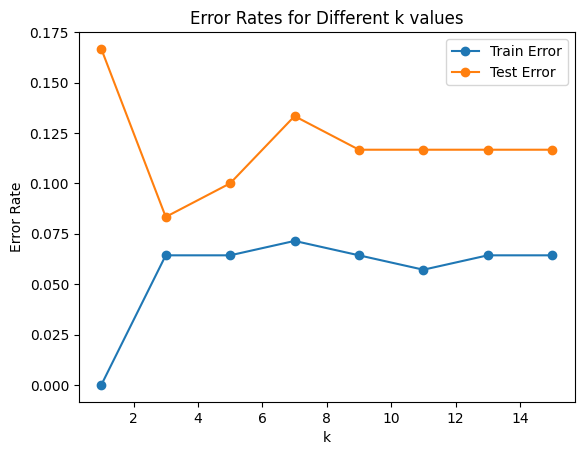

In [13]:
# Train and test KNN for different k values
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_errors = []
test_errors = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train.tolist(), y_train.tolist())
    
    train_predictions = knn.predict(X_train.tolist())
    test_predictions = knn.predict(X_test.tolis4t())

    train_error = knn.compute_error(y_train, train_predictions)
    test_error = knn.compute_error(y_test, test_predictions)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(f"k={k}: Training Error: {train_error*100:.2f}% | Test Error: {test_error*100:.2f}%")

# Plotting the errors
plt.plot(k_values, train_errors, '-o', label='Train Error')
plt.plot(k_values, test_errors, '-o', label='Test Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Error Rates for Different k values')
plt.show()